In [1]:
%load_ext autoreload
%autoreload 2
%matplotlib inline

In [20]:
import networkx as nx
import EoN
import matplotlib.pyplot as plt

# SIR Model on G(n,p) Network

Code adapted from first example found here: https://arxiv.org/pdf/2001.02436.pdf.

## TODO:
**Emma & Sam**
* Get more appropriate graph for a prison
* Set parameters to be COVID specific --- Check paper she posted

**Me & Marcel**
* Figure out how to incorporate birth rate into prison
* Figure out how to incorporate inmate releases
* Use SIR model

## Set Parameters

In [21]:
# Set G(n,p) model-specific parameters
N = 5000 # number of individuals
kave = 5 # expected number of contacts per person

# Set simulation-specific parameters
rho = 0.005 # initial fraction infected
tau = 0.7 # transmission rate
gamma = 1.0 # recovery rate

## Generate graph

In [22]:
G = nx.fast_gnp_random_graph(N, kave/(N-1))

## Run Simulation

fast_SIR uses and events-based simulation and assumes Markovian properties(?). I.e. it assumes:
* constant transmission and recovery rates

In [23]:
t1, S1, I1, R1 = EoN.fast_SIR(G, tau, gamma, rho=rho)

In [28]:
deaths = (R1 * 0.1)
t_deaths = t1 + 7

## Plot Results

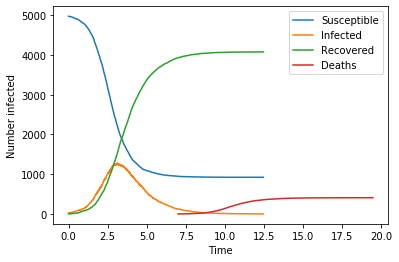

In [29]:
plt.plot(t1, S1, label = 'Susceptible')
plt.plot(t1, I1, label = 'Infected')
plt.plot(t1, R1, label = 'Recovered')
plt.plot(t_deaths, deaths, label = 'Deaths')

plt.xlabel('Time')
plt.ylabel('Number infected')
plt.legend()
plt.show()